# The shoddy code I used to compute the critical exponents

In [1]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random
import scipy.optimize

%matplotlib inline

In [2]:
def spec_heat_ps(energy_list, T, N):
    """Compute the specific heat per spin for an input list of energy values at temperature T and lattice sites N"""
    
    if type(energy_list) is list:
        energy_list = np.array(energy_list)
    
    c = (1/(T**2 * N)) * np.var(energy_list)
    
    return c

def sus(mag_list, T, N):
    """Compute susceptibility for an input list of magnetization values at temperature T and lattice sites N"""
    
    if type(mag_list) is list:
        mag_list = np.array(mag_list)
    
    chi = (1/(T*N)) * np.var(mag_list)
    
    return chi

In [3]:
def bootstrap_mean(values, n):
    """Uses the bootstrap method to compute the error in the mean of a given list of values"""
    
    ns = len(values)
    
    means = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(values, ns)
        means[i] = np.mean(samples)
    
    error = np.std(means)
    
    return error
    
    
    
    
def bootstrap_c(energies, T, N, n):
    """Uses bootstrap to compute the error in the specific heat for an input set of energies"""
    
    ns = len(energies)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(energies, ns)
        values[i] = spec_heat_ps(samples, T, N)
        
    error = np.std(values)
    
    return error





def bootstrap_s(magps, T, N, n):
    """Uses bootstrap to compute the error in the susceptibility for an input set of magnetization"""
    
    ns = len(magps)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(magps, ns)
        values[i] = sus(samples, T, N)
    
    error = np.std(values)
    
    return error
        

In [4]:
eneps_listv2 = np.load('eneps_list50v2.npy')[()]
spec_heatv2 = np.load('spec_heat50v2.npy')[()]
magps_listv2 = np.load('magps_list50v2.npy')[()]
mag_susv2 = np.load('mag_sus50v2.npy')[()]
energy_dictv2 = np.load('ene_dict50v2.npy')[()]
mag_dictv2 = np.load('mag_dict50v2.npy')[()]

In [5]:
temps = [i for i in np.arange(1.6, 2.91, 0.01)]

In [6]:
keys = list(mag_dictv2.keys())

In the original simulation, I stored the values of the magnetizations, not the absolute magnetizations. This is just a sort of patch-y way of turning it into the absolute magnetization and then computing the error.

In [7]:
absmagmeanv2 = []
absshv2 = []

for k in keys:
    absmag = [abs(m) for m in mag_dictv2[k]]
    absmagmeanv2.append(np.mean(absmag))
    absshv2.append(np.var(absmag))
    
absmagmeanv2 = np.array(absmagmeanv2)/2500
absshv2 = np.array(absshv2)/2500

for i in range(len(temps)):
    absshv2[i] = absshv2[i]/temps[i]

# Computing Error

In [8]:
absmag = np.zeros((131, 2500))

for i in range(131):
    for j in range(2500):
        absmag[i, j] = abs(mag_dictv2[keys[i]][j])

mag_errors = []

for i in range(131):
    mag_errors.append(bootstrap_mean(absmag[i,:], 1000))
    
mag_errors = np.array(mag_errors)/2500

sus_errors = []

for i in range(131):
    sus_errors.append(bootstrap_s(absmag[i,:], temps[i], 2500, 1000))

sh_errors = []

for i in range(131):
    sh_errors.append(bootstrap_c(energy_dictv2[keys[i]], temps[i], 2500, 1000))

ene_errors = []

for k in keys:
    ene_errors.append(bootstrap_mean(energy_dictv2[k], 1000))
    
ene_errors = np.array(ene_errors)/2500

# Finding Critical Exponents and Temp

In [13]:
def power(x, a, b, c):
    return a*((b-x)/b)**c

In [14]:
def powerpos(x, a, b, c):
    return a*((x-b)/b)**c

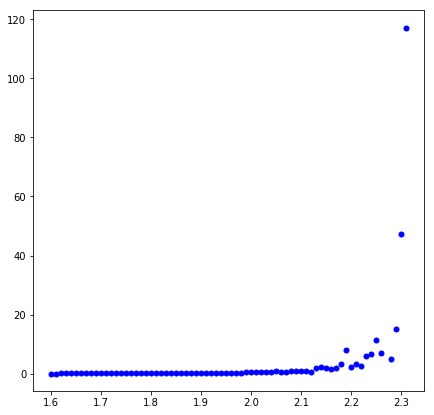

In [49]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[:71], mag_susv2[:71], 'bo', markersize = 5)

Text(0.5,0,'Temperature')

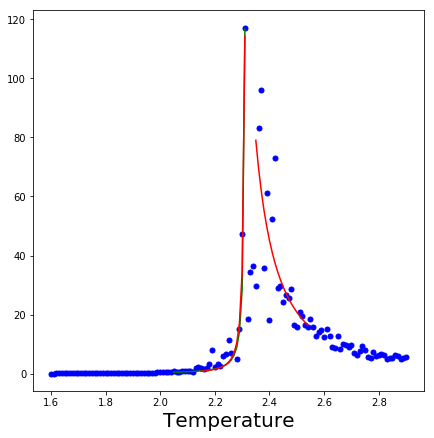

In [114]:
plt.figure(figsize=(7,7)) 
plt.plot(temps, mag_susv2, 'bo', markersize = 5)
plt.plot(temps[45:72], f_test, 'g')
plt.plot(temps[55:72], f_S, 'r')
plt.plot(temps[75:95], f_sp, 'r')
plt.xlabel("Temperature", fontsize=20)

In [121]:
scipy.optimize.curve_fit(power, temptest[55:71], magtest[55:71], p0 = [.1, 2.35, -1.75], sigma = sus_test[55:71], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.02028932,  2.31615482, -1.45988535]),
 array([[ 2.18034068e-05, -6.01551957e-06,  4.16678261e-04],
        [-6.01551957e-06,  2.38100446e-06, -1.37546711e-04],
        [ 4.16678261e-04, -1.37546711e-04,  8.82454593e-03]]))

In [16]:
f_test = [power(x, 0.02028932,  2.31615482, -1.45988535) for x in temps[45:72]]

In [17]:
f_S = [power(x, 0.00808415,  2.32030466, -1.76424189) for x in temps[55:72]]

Text(0.5,0,'Temperature')

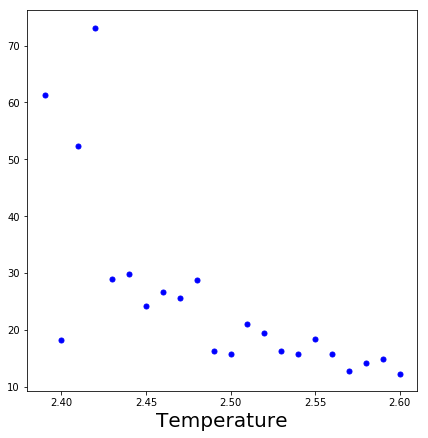

In [110]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[79:-30], mag_susv2[79:-30], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)

In [125]:
scipy.optimize.curve_fit(powerpos, temps[79:-32], mag_susv2[79:-32], p0 = [1, 2.2, -1.75], sigma = sus_errors[79:-32], maxfev=10000)

(array([ 0.69134835,  2.24676938, -1.55573007]),
 array([[0.52804645, 0.10296722, 0.689588  ],
        [0.10296722, 0.02197485, 0.14080351],
        [0.689588  , 0.14080351, 0.92220431]]))

In [18]:
f_sp = [powerpos(x, 0.52919593,  2.21346758, -1.79714844) for x in temps[75:95]]

In [19]:
f_testp = [powerpos(x, 0.69134835,  2.24676938, -1.55573007) for x in temps[75:95]]

In [20]:
f_m = [power(x, 1.18568553, 2.28694199, 0.12320771) for x in temps[40:69]]

Text(0,0.5,'Magnetization')

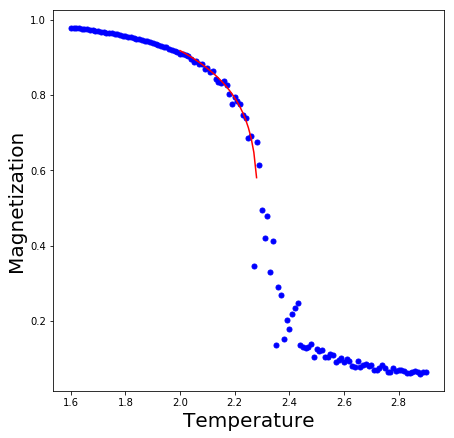

In [491]:
plt.figure(figsize=(7,7)) 
plt.plot(temps, absmagmeanv2, 'bo', markersize = 5)
plt.plot(temps[40:69], f_m, 'r')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Magnetization", fontsize=20)

In [499]:
scipy.optimize.curve_fit(power, temps[55:67], absmagmeanv2[55:67], p0 = [1, 2.35, 0.125], sigma = mag_errors[55:67], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([1.18568553, 2.28694199, 0.12320771]),
 array([[0.00256788, 0.00058717, 0.00095961],
        [0.00058717, 0.00015994, 0.00022848],
        [0.00095961, 0.00022848, 0.00036243]]))

Text(0.5,0,'Temperature')

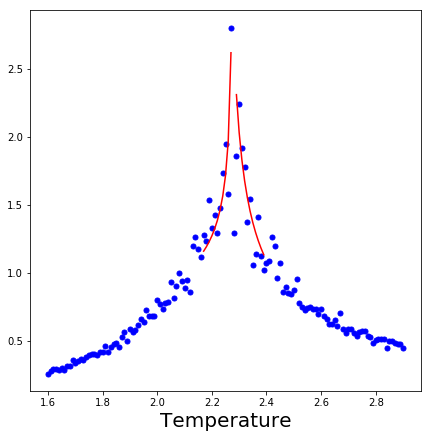

In [513]:
plt.figure(figsize=(7,7)) 
plt.plot(temps, spec_heatv2, 'bo', markersize = 5)
plt.plot(temps[57:68], f_sh, 'r')
plt.plot(temps[69:80], f_shp, 'r')
plt.xlabel("Temperature", fontsize=20)

In [341]:
scipy.optimize.curve_fit(power, temps[55:68], spec_heatv2[55:68], p0 = [1, 2.3, 0], sigma = sh_errors[55:68], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.49609145,  2.27550326, -0.27610753]),
 array([[ 1.11794963e-02, -4.98705137e-04,  7.23606153e-03],
        [-4.98705137e-04,  3.30492606e-05, -3.52430305e-04],
        [ 7.23606153e-03, -3.52430305e-04,  4.83788262e-03]]))

In [21]:
f_sh = [power(x, 0.49609145,  2.27550326, -0.27610753) for x in temps[54:68]]

Text(0.5,0,'Temperature')

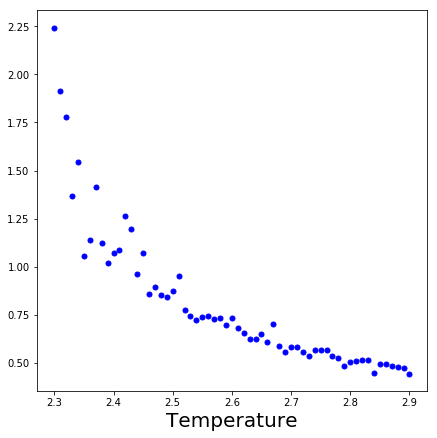

In [310]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[70:], spec_heatv2[70:], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)

In [132]:
scipy.optimize.curve_fit(powerpos, temps[68:-40], spec_heatv2[68:-40], p0 = [1, 2.2, 0], sigma = sh_errors[68:-40], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.17672798,  2.04055418, -1.05579721]),
 array([[0.00035872, 0.00169161, 0.00469371],
        [0.00169161, 0.01321301, 0.03256214],
        [0.00469371, 0.03256214, 0.08228237]]))

In [22]:
f_shp = [powerpos(x, 0.23996159, 2.25156583, -0.55632244) for x in temps[69:83]]

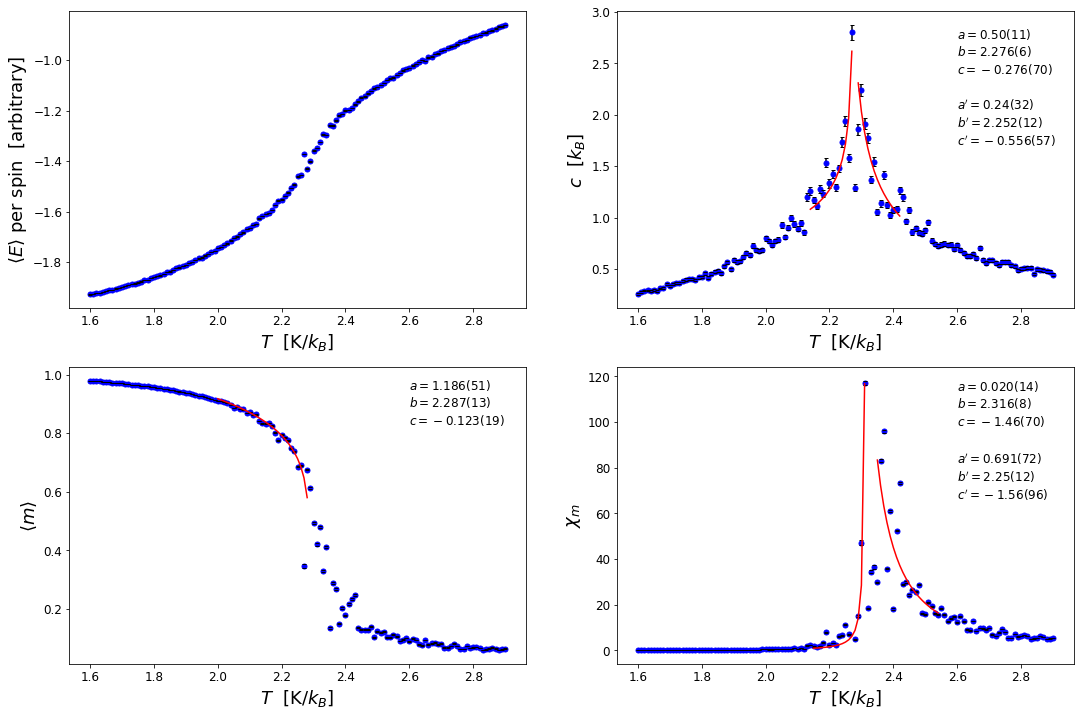

In [26]:
fig = plt.figure(figsize=(18, 12))
plt.tight_layout(pad=0, w_pad= 2, h_pad= 2)

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_listv2, 'bo', markersize = 5)
plt.errorbar(temps, eneps_listv2, yerr = ene_errors, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)



fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heatv2, 'bo', markersize = 5)
plt.errorbar(temps, spec_heatv2, yerr = sh_errors, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.plot(temps[54:68], f_sh, 'r')
plt.plot(temps[69:83], f_shp, 'r')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.text(2.6, 2.4,r'$a = 0.50(11)$' +'\n' + r'$ b = 2.276(6)$' + '\n' + r'$c = -0.276(70)$', fontsize=12)
plt.text(2.6, 1.7,r"$a' = 0.24(32)$" +'\n' + r"$b' = 2.252(12)$" +'\n' + "$c' = -0.556(57)$", fontsize=12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, absmagmeanv2, 'bo', markersize = 5)
plt.errorbar(temps, absmagmeanv2, yerr = mag_errors, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.plot(temps[40:69], f_m, 'r')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.text(2.6, 0.83, r'$a = 1.186(51)$' +'\n' + r'$ b = 2.287(13)$' + '\n' + r'$c = -0.123(19)$', fontsize=12)

fig.add_subplot(2, 2, 4 )
plt.plot(temptest, magtest, 'bo', markersize = 5)
plt.errorbar(temptest, magtest, yerr = sus_test, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.plot(temps[55:72], f_test[10:], 'r')
plt.plot(temps[75:95], f_testp, 'r')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.text(2.6, 98.5, r'$a = 0.020(14)$' +'\n' + r'$ b = 2.316(8)$' + '\n' + r'$c = -1.46(70)$', fontsize=12)
plt.text(2.6, 66, r"$a' = 0.691(72)$" +'\n' + r"$b' = 2.25(12)$" +'\n' + "$c' = -1.56(96)$", fontsize=12)

plt.savefig('Ising Measurements.pdf', bbox_inches = 'tight')